In [1]:
# Hãy dự báo điểm thi đánh giá năng lực phần NGONNGU
# Dựa trên điểm T5 và T6 sử dụng mô hình hồi quy tuyến tính
# NGONNGU =  f(T5, T6) = A0 + A1*T5 + A2*T6 + epsilon
# Với các thiết lập tập training chiếm 80% và random state = 16
# Pipeline: Input -> Model -> Output
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df = df[['T5', 'T6', 'NGONNGU']]
# Tập dữ liệu Input và Output
X = df[['T5', 'T6']].values #input
y = df['NGONNGU'].values #output

In [2]:
# -> NGONNGU = 3.8860 + 0.1114*T5 -0.1289*T6
# Chia tách ra training(huấn luyện) và testing(kiểm thử)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Kiểm tra hệ số
print(model.intercept_) 
print(model.coef_)

# Dự đoán trên tập test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

4.012050047743211
[ 0.19517246 -0.23194661]


In [3]:
import numpy as np
# form sklearn import metrics
# y_test_pred = model.predict(X_test.reshape(-1,1))
# print('Score or R-Squared', model.score(X_test, y_test))
# print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
# print('Mean squared Error: ', metrics.mean_square_error)

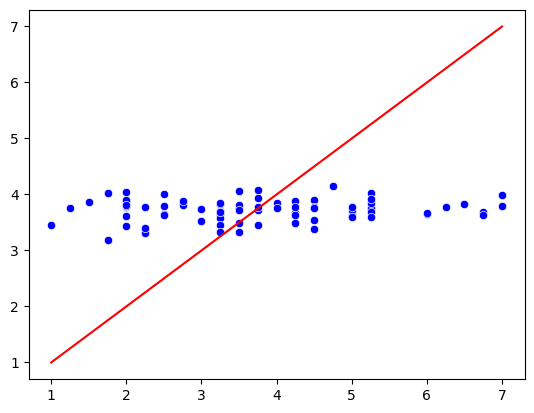

In [4]:
# Cách 2 Dùng Scatter giữa Actual và Predict
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), markers='o', color='blue')
sns.lineplot(x = y_train.flatten(), y = y_train.flatten(), markers='s', color='red')
plt.show()

In [5]:
# Giải thích đồ thị: cột x = y_train, cột y = y_train_pred
# Mô hình tốt là đi theo đường màu đỏ
# Sai số nhiều ở các điểm từ 4.5 trở lên và 2.5 trở xuống
# Có thể thấy mô hình không tốt

In [6]:
# Cách 3 Dùng Residuals plot
y_test_pred = model.predict(X_test)
dfTestValidation = pd.DataFrame(list(zip(X_test[:,0], X_test[:,1], y_test.flatten(), y_test_pred.flatten())), columns=['T5_test', 'T6_Test', 'y_test', 'y_test_predicted'])
dfTestValidation['Residuals'] = dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,T5_test,T6_Test,y_test,y_test_predicted,Residuals
0,8.5,8.3,3.75,3.745859,0.004141
1,5.8,3.7,4.75,4.285848,0.464152
2,6.8,9.0,3.50,3.251703,0.248297
3,4.0,5.5,5.75,3.517034,2.232966
4,8.6,8.1,4.75,3.811766,0.938234
5,5.3,6.1,2.75,3.631590,-0.881590
6,8.0,6.6,2.25,4.042582,-1.792582
7,5.4,6.6,3.75,3.535134,0.214866
8,7.1,7.7,2.00,3.611786,-1.611786
9,7.5,6.9,4.00,3.875412,0.124588


In [7]:
# Cách 3 Dùng Residuals plot
y_train_pred = model.predict(X_train)
dfTrainValidation = pd.DataFrame(list(zip(X_train[:,0], X_train[:,1], y_train.flatten(), y_train_pred.flatten())), columns=['T5_train', 'T6_train', 'y_train', 'y_train_predicted'])
dfTrainValidation['Residual'] = dfTrainValidation['y_train'] - dfTrainValidation['y_train_predicted']
dfTrainValidation

,T5_train,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,5.25,3.763403,1.486597
1,8.5,7.8,1.50,3.861832,-2.361832
2,8.9,8.5,6.25,3.777539,2.472461
3,4.9,6.5,1.00,3.460742,-2.460742
4,8.0,7.2,4.50,3.903414,0.596586
...,...,...,...,...,...
75,6.3,8.0,4.50,3.386064,1.113936
76,8.4,8.1,3.75,3.772731,-0.022731
77,5.0,5.1,2.00,3.804985,-1.804985
78,3.5,5.6,2.25,3.396253,-1.146253


[]

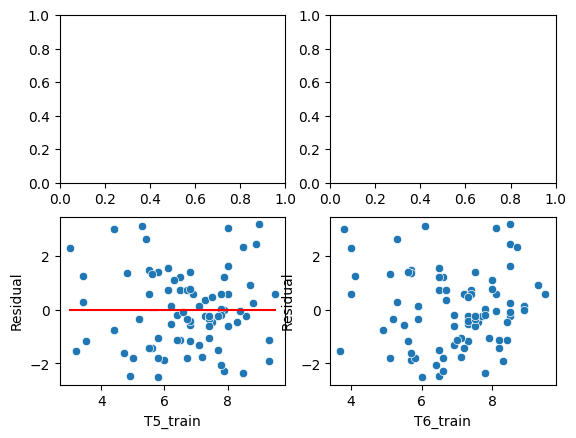

In [8]:
fig, axes = plt.subplots(2,2)
sns.scatterplot(data = dfTrainValidation, x='T5_train', y = 'Residual', ax=axes[1,0])
sns.lineplot(data = dfTrainValidation, x='T5_train', y = [0] * len(dfTrainValidation), ax=axes[1,0], color='r')
sns.scatterplot(data = dfTrainValidation, x='T6_train', y = 'Residual', ax=axes[1,1])
plt.plot()

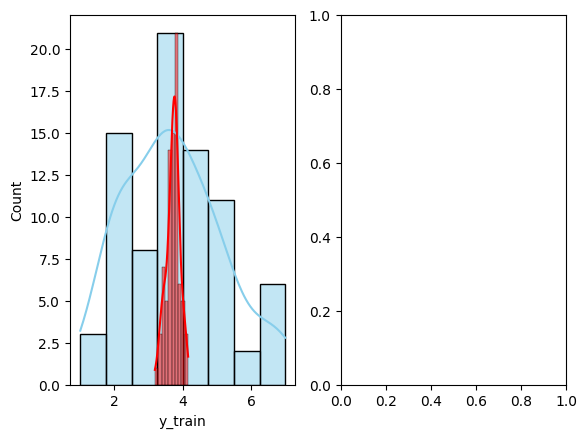

In [9]:
# Cách 4: Dùng biểu đồ HISTOGRAM
# Đường màu xanh sẽ là phân phối giá trị thực tế
# Đường màu đỏ sẽ là phân phối giá trị dự báo
# Nếu 2 đường trùng nhau thì mô hình tốt
# Nếu 2 đường không trùng nhau thì mô hình không tốt
fig, axes = plt.subplots(1,2)
sns.histplot(data = dfTrainValidation, x='y_train', color='skyblue', label='Actual', kde=True, ax=axes[0])
sns.histplot(data = dfTrainValidation, x='y_train_predicted', color='red', label='Predict', kde=True, ax=axes[0])
plt.show()

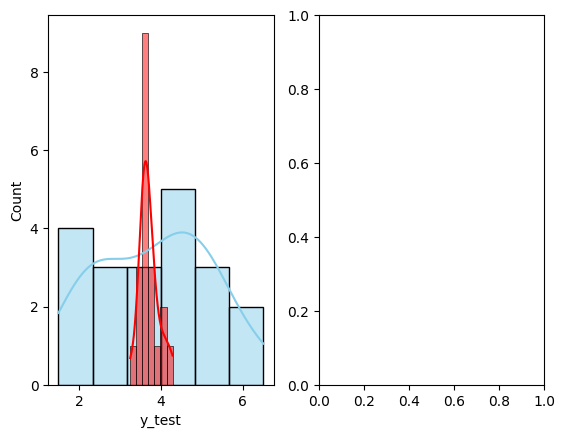

In [10]:
fig, axes = plt.subplots(1,2)
sns.histplot(data = dfTestValidation, x='y_test', color='skyblue', label='Actual', kde=True, ax=axes[0])
sns.histplot(data = dfTestValidation, x='y_test_predicted', color='red', label='Predict', kde=True, ax=axes[0])
plt.show()

In [11]:
# Bias(error)
# Bias cao thì mô hình không tốt
# Bias thấp thì mô hình tốt -> tốt: 
# variance cao -> tốt tiêu cực (học tất cả mọi thứ đang xảy ra trong dữ liệu, khớp tới mức các trường hợp đặc biệt)
# variance thấp -> tốt tích cực (học những gì cần thiết rút trích ra được cốt lỗi từ đó mô hình có thể suy diễn ra các trường hợp khác)